In [1]:
# 나눔 폰트 설치
!apt-get update -qq
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped dire

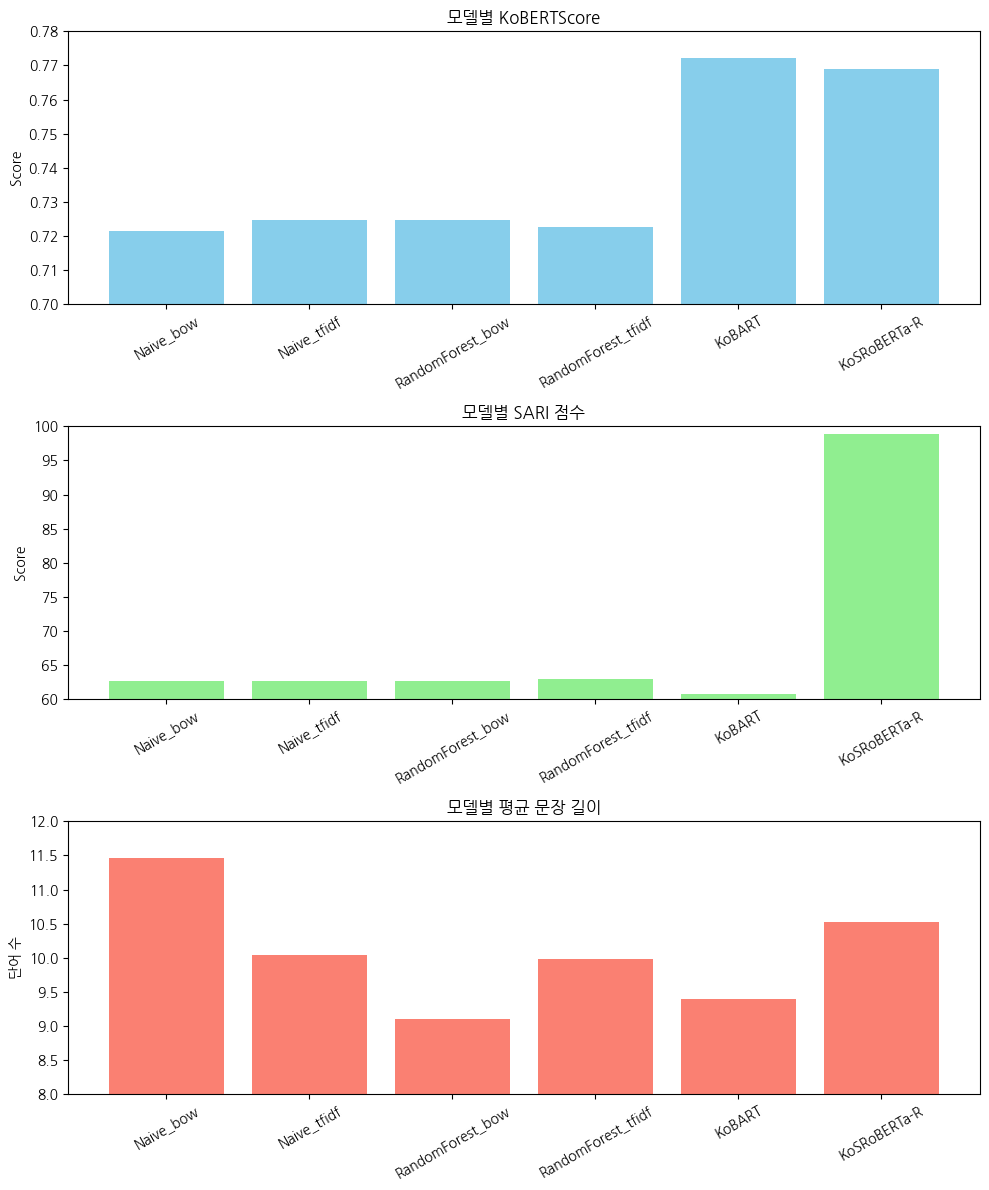

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ================================
# 성능 데이터
data = {
    'Model': [
        'Naive_bow', 'Naive_tfidf',
        'RandomForest_bow', 'RandomForest_tfidf',
        'KoBART', 'KoSRoBERTa-R'
    ],
    'KoBERTScore': [0.7214, 0.7246, 0.7247, 0.7226, 0.7721, 0.7690],
    'SARI': [62.60, 62.67, 62.61, 62.96, 60.73, 98.94],
    'Avg_Length': [11.46, 10.04, 9.10, 9.98, 9.40, 10.53]
}
df = pd.DataFrame(data)

# ================================
# 그래프 생성
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
plt.subplots_adjust(hspace=0.5)

axs[0].bar(df['Model'], df['KoBERTScore'], color='skyblue')
axs[0].set_title('모델별 KoBERTScore')
axs[0].set_ylabel('Score')
axs[0].set_ylim([0.70, 0.78])
axs[0].tick_params(axis='x', rotation=30)

axs[1].bar(df['Model'], df['SARI'], color='lightgreen')
axs[1].set_title('모델별 SARI 점수')
axs[1].set_ylabel('Score')
axs[1].set_ylim([60, 100])
axs[1].tick_params(axis='x', rotation=30)

axs[2].bar(df['Model'], df['Avg_Length'], color='salmon')
axs[2].set_title('모델별 평균 문장 길이')
axs[2].set_ylabel('단어 수')
axs[2].set_ylim([8, 12])
axs[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.savefig("model_performance_comparison.png", dpi=300)
plt.show()


In [3]:
from google.colab import files
files.download("model_performance_comparison.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>